In [127]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import pickle
print(f'Pickle Version: {pickle.format_version}')

Pickle Version: 4.0


In [3]:
_pth_tst = 'data/test_2022-08-08.csv'
_pth_trn = 'data/train_2021-12-24.csv'
_pth_emb = 'data/embeddings.pkl'
_pth_enc ='data/encoders.pkl'

train = pd.read_csv(_pth_trn)
test = pd.read_csv(_pth_tst)

with open(_pth_emb, 'rb') as handle:
    embeds = pickle.load(handle)

In [4]:
# with open(_pth_enc, 'rb') as handle:
#     ecode = pickle.load(handle)

Using TensorFlow backend.


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99144 entries, 0 to 99143
Data columns (total 19 columns):
adv_date              99144 non-null object
sld_date              99144 non-null object
make_date             99144 non-null object
Sale_Price            99144 non-null float64
Odometer              99119 non-null float64
Power                 99090 non-null float64
Fuel_Urban            87810 non-null float64
Make_Code             99144 non-null object
Family_Code           99144 non-null object
Region_Description    99144 non-null object
Vehicle_Code          99144 non-null int64
inventory_days        99144 non-null int64
age_list_day          99144 non-null int64
age_sell_day          99144 non-null int64
km_per_day            99119 non-null float64
fuel_per_power        87810 non-null float64
odo_per_fuel          87789 non-null float64
odo_per_power         99065 non-null float64
pow_times_odo         99065 non-null float64
dtypes: float64(9), int64(4), object(6)
memory usa

In [8]:
train.columns

Index(['adv_date', 'sld_date', 'make_date', 'Sale_Price', 'Odometer', 'Power',
       'Fuel_Urban', 'Make_Code', 'Family_Code', 'Region_Description',
       'Vehicle_Code', 'inventory_days', 'age_list_day', 'age_sell_day',
       'km_per_day', 'fuel_per_power', 'odo_per_fuel', 'odo_per_power',
       'pow_times_odo'],
      dtype='object')

In [14]:
enc_cols = list(ecode)
enc_cols

['Make_Code', 'Family_Code', 'Region_Description']

In [130]:
feat_cols = ['Odometer', 'Power', 'Fuel_Urban', 'inventory_days', 
             'age_sell_day', 'km_per_day', 'fuel_per_power', 
             'odo_per_fuel', 'odo_per_power','pow_times_odo']

enc_cols = list(ecode)

In [107]:
def get_embedded_feat(feat, encod_dict, feat_name='Family_Code'):
    '''Return embeddings from feature column using encoded dict
    '''
    feat_df = feat.to_frame()
    encodings = encod_dict[feat_name].reset_index()
    feat_tranf = feat_df.merge(encodings, how='left', left_on=[feat_name], right_on=['index'], indicator=True)
    print(feat_tranf._merge.value_counts())
    return feat_tranf.loc[:,[c for c in encodings.columns if c.startswith(feat_name)]]

In [108]:
list(embeds)

['Make_Code', 'Family_Code', 'Region_Description']

In [109]:
embed_dflist = []

for f in list(embeds):
    df = get_embedded_feat(train[f], embeds, feat_name=f)
    embed_dflist.append(df)

both          99144
right_only        0
left_only         0
Name: _merge, dtype: int64
both          99144
right_only        0
left_only         0
Name: _merge, dtype: int64
both          99144
right_only        0
left_only         0
Name: _merge, dtype: int64


In [125]:
X_train_df = pd.concat([train.loc[:,feat_cols]]+embed_dflist, axis=1)

<AxesSubplot:>

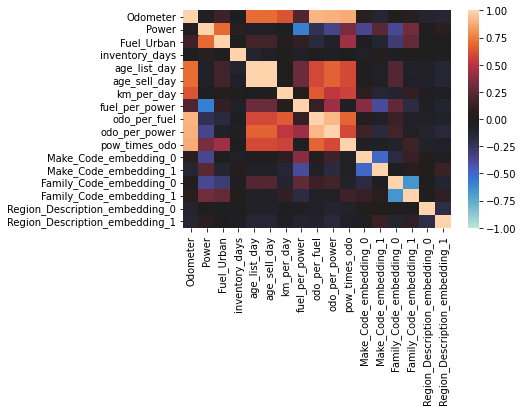

In [132]:
sns.heatmap(X_train_df.corr(), vmax=1, vmin=-1, center=0)